In [37]:

%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split




In [38]:
review_data = pd.read_json('/Users/anush/Desktop/MS/Fall_17/256/project/reviews_merged.json')

In [39]:
review_data

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,7806397051,"[3, 4]",1,Very oily and creamy. Not at all what I expect...,"01 30, 2014",A1YJEY40YUW4SE,Andrea,Don't waste your money,1391040000
1,7806397051,"[1, 1]",3,This palette was a decent price and I was look...,"04 18, 2014",A60XNB876KYML,Jessica H.,OK Palette!,1397779200
2,7806397051,"[0, 1]",4,The texture of this concealer pallet is fantas...,"09 6, 2013",A3G6XNM240RMWA,Karen,great quality,1378425600
3,7806397051,"[2, 2]",2,I really can't tell what exactly this thing is...,"12 8, 2013",A1PQFP6SAJ6D80,Norah,Do not work on my face,1386460800
4,7806397051,"[0, 0]",3,"It was a little smaller than I expected, but t...","10 19, 2013",A38FVHZTNQ271F,Nova Amor,It's okay.,1382140800
5,7806397051,"[1, 2]",5,"I was very happy to get this palette, now I wi...","04 15, 2013",A3BTN14HIZET6Z,"S. M. Randall ""WildHorseWoman""",Very nice palette!,1365984000
6,7806397051,"[1, 3]",1,PLEASE DONT DO IT! this just rachett the palet...,"08 16, 2013",A1Z59RFKN0M5QL,"tasha ""luvely12b""",smh!!!,1376611200
7,7806397051,"[0, 1]",2,"Chalky,Not Pigmented,Wears off easily,Not a Co...","09 4, 2013",AWUO9P6PL1SY8,TreMagnifique,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800
8,9759091062,"[0, 0]",2,Did nothing for me. Stings when I put it on. I...,"07 13, 2014",A3LMILRM9OC3SA,NaN,"no Lightening, no Brightening,......NOTHING",1405209600
9,9759091062,"[0, 0]",3,I bought this product to get rid of the dark s...,"12 27, 2013",A30IP88QK3YUIO,Amina Bint Ibraheem,Its alright,1388102400


In [40]:
review_data.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [41]:
review_data=review_data.drop(['helpful','reviewTime','reviewerName','unixReviewTime'],axis=1)

In [42]:
review_data

,asin,overall,reviewText,reviewerID,summary
0,7806397051,1,Very oily and creamy. Not at all what I expect...,A1YJEY40YUW4SE,Don't waste your money
1,7806397051,3,This palette was a decent price and I was look...,A60XNB876KYML,OK Palette!
2,7806397051,4,The texture of this concealer pallet is fantas...,A3G6XNM240RMWA,great quality
3,7806397051,2,I really can't tell what exactly this thing is...,A1PQFP6SAJ6D80,Do not work on my face
4,7806397051,3,"It was a little smaller than I expected, but t...",A38FVHZTNQ271F,It's okay.
5,7806397051,5,"I was very happy to get this palette, now I wi...",A3BTN14HIZET6Z,Very nice palette!
6,7806397051,1,PLEASE DONT DO IT! this just rachett the palet...,A1Z59RFKN0M5QL,smh!!!
7,7806397051,2,"Chalky,Not Pigmented,Wears off easily,Not a Co...",AWUO9P6PL1SY8,"Chalky, Not Pigmented, Wears off easily, Not a..."
8,9759091062,2,Did nothing for me. Stings when I put it on. I...,A3LMILRM9OC3SA,"no Lightening, no Brightening,......NOTHING"
9,9759091062,3,I bought this product to get rid of the dark s...,A30IP88QK3YUIO,Its alright


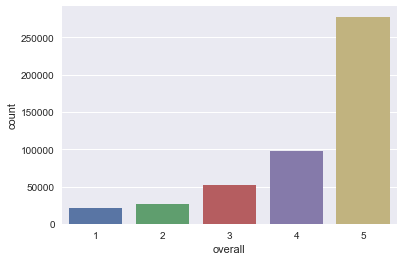

In [43]:
sbn.countplot(review_data['overall'])

In [44]:
def data_clean( rev, remove_stopwords=True): 
    

    new_text = re.sub("[^a-zA-Z]"," ", rev)
   
    words = new_text.lower().split()
    
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))

    
    return(ary)

In [45]:
clean_reviewData = []
for rev in review_data['reviewText']:
    clean_reviewData.append( " ".join(data_clean(rev)))
    
clean_summaryData = []
for rev in review_data['summary']:
    clean_summaryData.append( " ".join(data_clean(rev)))


In [46]:
Most_used_Words_Review =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

use        244771
like       209093
hair       168900
look       167483
product    164290
love       149069
great      142607
one        131614
wear       124015
fit        117681
good       117492
size       116958
would      114066
get        112096
well       109784
skin       108753
color      107926
realli     104926
work       100111
time        88412
dtype: int64


In [47]:
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[:20]
print (Most_used_Words_Summary)

great      61140
love       43808
good       31597
nice       26907
product    16344
work       14915
shoe       14102
fit        13363
comfort    13023
cute       12905
perfect    12215
like       11513
best       10341
hair        9506
price       9483
color       9476
look        9372
qualiti     8721
size        8326
beauti      8212
dtype: int64


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(clean_reviewData)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names(), text_vectorizer.idf_))


In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = review_data.reviewText[:10]
for test in sample_review:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: -0.3561, 
neg: 0.124, 
neu: 0.799, 
pos: 0.077, 
Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This palette was a decent price and I was looking for a few different shades. This palette conceals decently, however, it does somewhat cake up and crease.
compound: 0.9714, 
neg: 0.049, 
neu: 0.714, 
pos: 0.237, 
The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use to me but I use at least two of them on a regular basis, and two more occasionally, which is the only reason I'm giving it for stars, I feel like the range of colors is kind of a waste for me, but the  product itself  is wonderful, it's not cakey, gives me a natural for and concealed my imperfections, therefore I highly recommend 

In [50]:
from sklearn.cluster import MiniBatchKMeans

clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(test_vecor)
kmodel_clusters = kmodel.predict(test_vecor)
kmodel_distances = kmodel.transform(test_vecor)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 dress
 wear
 fit
 look
 love

Cluster 1:
 nail
 brush
 polish
 use
 color

Cluster 2:
 ring
 look
 earring
 pictur
 like

Cluster 3:
 pant
 fit
 waist
 wear
 size

Cluster 4:
 hair
 use
 product
 dri
 curl

Cluster 5:
 like
 one
 good
 use
 get

Cluster 6:
 pair
 sock
 comfort
 wear
 feet

Cluster 7:
 love
 color
 bought
 perfect
 wear

Cluster 8:
 watch
 band
 look
 time
 wrist

Cluster 9:
 shoe
 comfort
 wear
 fit
 size

Cluster 10:
 great
 price
 look
 fit
 color

Cluster 11:
 oil
 use
 hair
 argan
 skin

Cluster 12:
 skin
 use
 product
 feel
 dri

Cluster 13:
 necklac
 chain
 money
 wast
 worth

Cluster 14:
 boot
 wear
 size
 fit
 comfort

Cluster 15:
 bra
 support
 bras
 comfort
 cup

Cluster 16:
 size
 shirt
 fit
 order
 small

Cluster 17:
 use
 product
 face
 like
 eye

Cluster 18:
 shampoo
 hair
 condition
 use
 product

Cluster 19:
 nice
 fit
 color
 look
 good



In [51]:
test_reviewText = review_data.reviewText
test_Ratings = review_data.overall
text_vectorizer = TfidfVectorizer(max_df=.8)
text_vectorizer.fit(test_reviewText)
def rate(r):
    ary2 = []
    for rating in r:
        tv = [0,0,0,0,0]
        tv[rating-1] = 1
        ary2.append(tv)
    return np.array(ary2)


In [52]:
test_reviewText =test_reviewText[:2000]
test_reviewText


0       Very oily and creamy. Not at all what I expect...
1       This palette was a decent price and I was look...
2       The texture of this concealer pallet is fantas...
3       I really can't tell what exactly this thing is...
4       It was a little smaller than I expected, but t...
5       I was very happy to get this palette, now I wi...
6       PLEASE DONT DO IT! this just rachett the palet...
7       Chalky,Not Pigmented,Wears off easily,Not a Co...
8       Did nothing for me. Stings when I put it on. I...
9       I bought this product to get rid of the dark s...
10      I have mixed feelings about this product. When...
11      Did nothing for my skin. Used as suggested and...
12      I bought this product about 3 months ago, I fi...
13      This gell did nothing at all. I religiously pu...
14      i got this to get rid of a scar and it did jus...
15      I used it for anal bleaching and it burned a b...
16      I order this cream along with their soap. It a...
17      Good p

In [53]:
test_Ratings = test_Ratings[:2000]
test_Ratings

0       1
1       3
2       4
3       2
4       3
5       5
6       1
7       2
8       2
9       3
10      3
11      1
12      5
13      1
14      5
15      2
16      5
17      4
18      3
19      5
20      5
21      5
22      5
23      5
24      5
25      3
26      5
27      5
28      5
29      3
       ..
1970    5
1971    5
1972    3
1973    4
1974    5
1975    4
1976    5
1977    3
1978    5
1979    4
1980    5
1981    4
1982    4
1983    2
1984    3
1985    1
1986    5
1987    3
1988    3
1989    3
1990    3
1991    4
1992    4
1993    5
1994    2
1995    4
1996    3
1997    3
1998    5
1999    1
Name: overall, Length: 2000, dtype: int64

In [54]:

X = text_vectorizer.transform(test_reviewText).toarray()
y = rate(test_Ratings.values)


In [55]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - ETA: 4:31 - loss: 1.6108 - acc: 0.125 - ETA: 2:25 - loss: 1.5722 - acc: 0.343 - ETA: 1:40 - loss: 1.5472 - acc: 0.437 - ETA: 1:18 - loss: 1.5300 - acc: 0.460 - ETA: 1:07 - loss: 1.5068 - acc: 0.493 - ETA: 58s - loss: 1.4752 - acc: 0.526 - ETA: 51s - loss: 1.4561 - acc: 0.54 - ETA: 46s - loss: 1.4445 - acc: 0.53 - ETA: 42s - loss: 1.4337 - acc: 0.54 - ETA: 38s - loss: 1.4234 - acc: 0.54 - ETA: 35s - loss: 1.4030 - acc: 0.55 - ETA: 33s - loss: 1.4001 - acc: 0.54 - ETA: 31s - loss: 1.3870 - acc: 0.55 - ETA: 29s - loss: 1.3755 - acc: 0.55 - ETA: 27s - loss: 1.3637 - acc: 0.56 - ETA: 25s - loss: 1.3565 - acc: 0.56 - ETA: 24s - loss: 1.3502 - acc: 0.56 - ETA: 23s - loss: 1.3359 - acc: 0.56 - ETA: 21s - loss: 1.3340 - acc: 0.57 - ETA: 20s - loss: 1.3228 - acc: 0.57 - ETA: 19s - loss: 1.3133 - acc: 0.57 - ETA: 18s - loss: 1.3116 - acc: 0.57 - ETA: 17s - loss: 1.3209 - acc: 0.56 - ETA: 16s - l

1600/1600 [==============================] - ETA: 16s - loss: 0.7430 - acc: 0.78 - ETA: 16s - loss: 0.6663 - acc: 0.78 - ETA: 16s - loss: 0.6503 - acc: 0.77 - ETA: 16s - loss: 0.6719 - acc: 0.77 - ETA: 16s - loss: 0.6458 - acc: 0.79 - ETA: 16s - loss: 0.6520 - acc: 0.80 - ETA: 16s - loss: 0.6607 - acc: 0.79 - ETA: 16s - loss: 0.6397 - acc: 0.80 - ETA: 15s - loss: 0.6549 - acc: 0.79 - ETA: 15s - loss: 0.6558 - acc: 0.80 - ETA: 15s - loss: 0.6388 - acc: 0.81 - ETA: 14s - loss: 0.6286 - acc: 0.81 - ETA: 14s - loss: 0.6213 - acc: 0.82 - ETA: 14s - loss: 0.6184 - acc: 0.81 - ETA: 13s - loss: 0.6170 - acc: 0.82 - ETA: 13s - loss: 0.6184 - acc: 0.82 - ETA: 13s - loss: 0.6169 - acc: 0.81 - ETA: 12s - loss: 0.6182 - acc: 0.81 - ETA: 12s - loss: 0.6203 - acc: 0.82 - ETA: 11s - loss: 0.6185 - acc: 0.82 - ETA: 11s - loss: 0.6155 - acc: 0.82 - ETA: 11s - loss: 0.6140 - acc: 0.82 - ETA: 10s - loss: 0.6082 - acc: 0.83 - ETA: 10s - loss: 0.6061 - acc: 0.83 - ETA: 10s - loss: 0.6011 - acc: 0.83 - ETA: 

1600/1600 [==============================] - ETA: 17s - loss: 0.1991 - acc: 1.00 - ETA: 17s - loss: 0.1737 - acc: 1.00 - ETA: 16s - loss: 0.1769 - acc: 0.98 - ETA: 16s - loss: 0.1766 - acc: 0.98 - ETA: 16s - loss: 0.1642 - acc: 0.98 - ETA: 16s - loss: 0.1864 - acc: 0.97 - ETA: 16s - loss: 0.1837 - acc: 0.97 - ETA: 16s - loss: 0.1781 - acc: 0.98 - ETA: 15s - loss: 0.1774 - acc: 0.97 - ETA: 15s - loss: 0.1727 - acc: 0.98 - ETA: 15s - loss: 0.1762 - acc: 0.98 - ETA: 14s - loss: 0.1794 - acc: 0.97 - ETA: 14s - loss: 0.1764 - acc: 0.98 - ETA: 14s - loss: 0.1808 - acc: 0.98 - ETA: 13s - loss: 0.1769 - acc: 0.98 - ETA: 13s - loss: 0.1782 - acc: 0.98 - ETA: 13s - loss: 0.1886 - acc: 0.97 - ETA: 12s - loss: 0.1864 - acc: 0.98 - ETA: 12s - loss: 0.1824 - acc: 0.98 - ETA: 11s - loss: 0.1787 - acc: 0.98 - ETA: 11s - loss: 0.1784 - acc: 0.98 - ETA: 11s - loss: 0.1762 - acc: 0.98 - ETA: 10s - loss: 0.1796 - acc: 0.98 - ETA: 10s - loss: 0.1772 - acc: 0.98 - ETA: 10s - loss: 0.1777 - acc: 0.98 - ETA: 

0.60750000000000004